<a href="https://colab.research.google.com/github/esramostafa20/Regression-Models-/blob/main/02_multiple_linear_Regression_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Multiple Linear Regression
 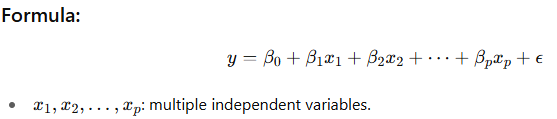

## When to use:
1. Modeling linear relationships involving multiple features.

2. When predictors are continuous or categorical (with encoding).

3. When linear assumptions hold approximately.

## When not to use:
1. Non-linear relationships.

2. When predictors are highly correlated (multicollinearity).

👉 Multicollinearity — when predictors (independent variables) are highly correlated with each other.

3. If relationship is more complex, consider polynomial or other models.

# 1. Import Libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

#  Preprocessing
| Task                          | Description                                                                          |
| ----------------------------- | ------------------------------------------------------------------------------------ |
| **Handling missing values**   | Filling (imputing) or removing rows/columns with missing data                        |
| **Encoding categorical data** | Converting strings (like "Male", "Female") to numbers using OneHot or Label encoding |
| **Scaling features**          | Making sure features are on the same scale (important for some models)               |
| **Removing duplicates**       | Dropping repeated rows                                                               |
| **Fixing typos**              | Correcting spelling mistakes in data                                                 |
| **Converting data types**     | Making sure columns are in correct format (e.g. date, float, int)                    |
| **Outlier detection/removal** | Identifying and possibly removing extreme values                                     |


# EDA

| Task                       | Description                                                     |
| -------------------------- | --------------------------------------------------------------- |
| **Summary statistics**     | Use `.describe()` to see mean, min, max, std, etc.              |
| **Data types check**       | Use `.info()` to check column types and null values             |
| **Value counts**           | Count unique values in categorical columns                      |
| **Plotting distributions** | Histograms or boxplots to see spread and detect outliers        |
| **Correlation matrix**     | See relationships between numerical features                    |
| **Scatter plots**          | Visualize relation between two variables (e.g., for regression) |
| **Group by analysis**      | Explore data by categories (e.g. group by gender or country)    |



# 2. Load and Understand the Data



In [3]:
df = pd.read_csv("/content/StudentsPerformance.csv")  # Or use any built-in dataset
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.dtypes


,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [14]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [15]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [17]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [18]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

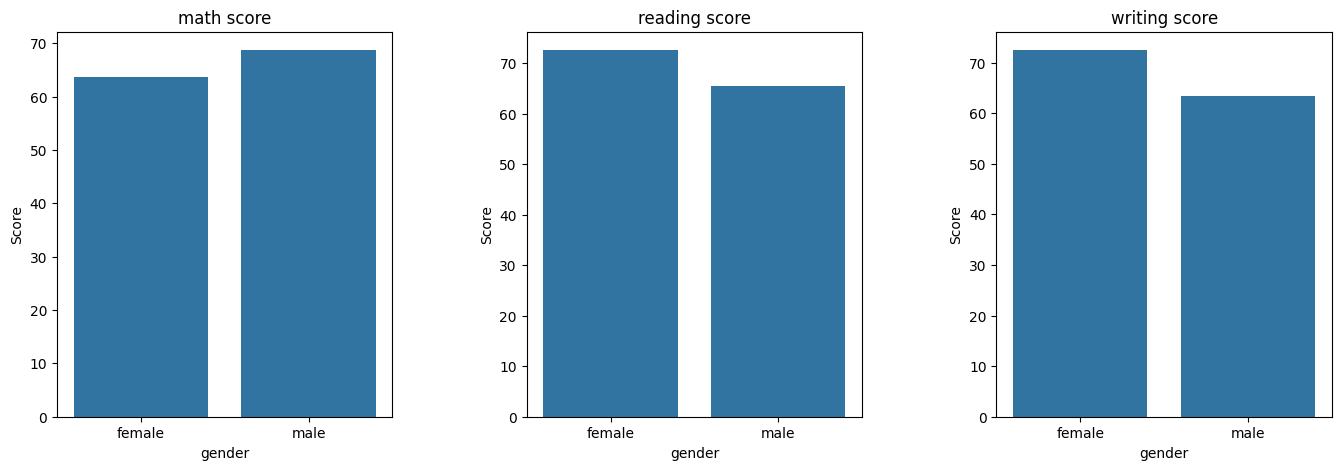

In [23]:
score_columns = list(df.columns[-3:])

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4, left=0.1, right=0.95)

for idx in range(3):
    column = score_columns[idx]

    # Group by gender and get mean scores
    gender_df = df.groupby("gender")[column].describe()

    # Barplot
    sns.barplot(x=gender_df.index, y=gender_df["mean"].values, ax=axs[idx])

    axs[idx].set_ylabel("Score")
    axs[idx].set_title(column)

plt.show()

/tmp/ipython-input-29-3530132720.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ethn_df.index, y=ethn_df.values, palette="Blues", ax=axs[idx])
/tmp/ipython-input-29-3530132720.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ethn_df.index, y=ethn_df.values, palette="Blues", ax=axs[idx])
/tmp/ipython-input-29-3530132720.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ethn_df.index, y=ethn_df.values, palette="Blues", ax=axs[idx])


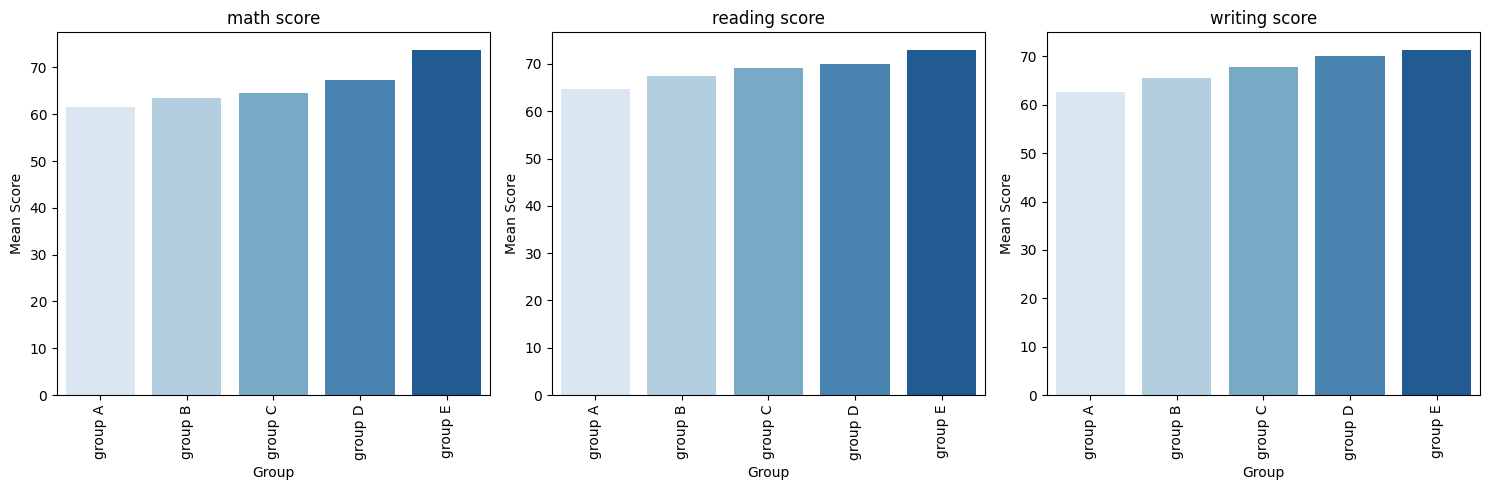

In [29]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4, left=0.1, right=0.95)

# Loop over each score column
for idx in range(3):
    column = score_columns[idx]

    # Group by ethnicity and get mean
    ethn_df = df.groupby("race/ethnicity")[column].mean()

    # Barplot
    sns.barplot(x=ethn_df.index, y=ethn_df.values, palette="Blues", ax=axs[idx])

    axs[idx].set_xlabel("Group")
    axs[idx].set_ylabel("Mean Score")
    axs[idx].set_title(column)
    axs[idx].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

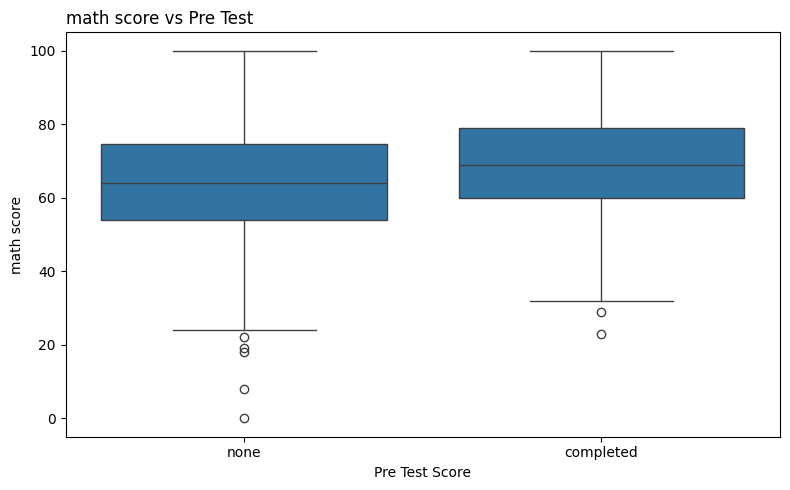

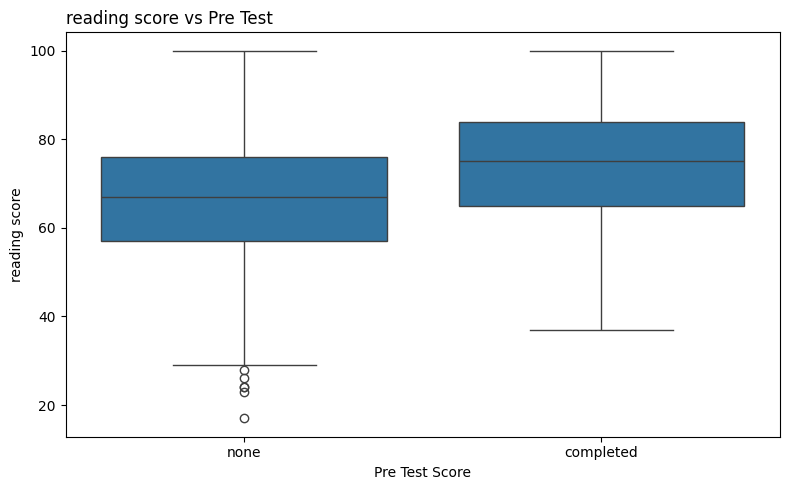

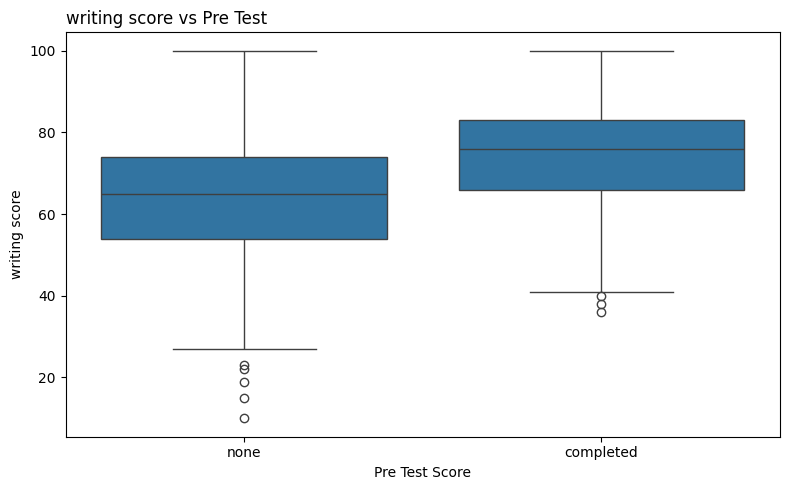

In [33]:
for item in df.columns[-3:]:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df["test preparation course"], y=df[item])
    plt.title(f"{item} vs Pre Test", loc="left")
    plt.xlabel("Pre Test Score")
    plt.ylabel(item)
    plt.tight_layout()
    plt.show()

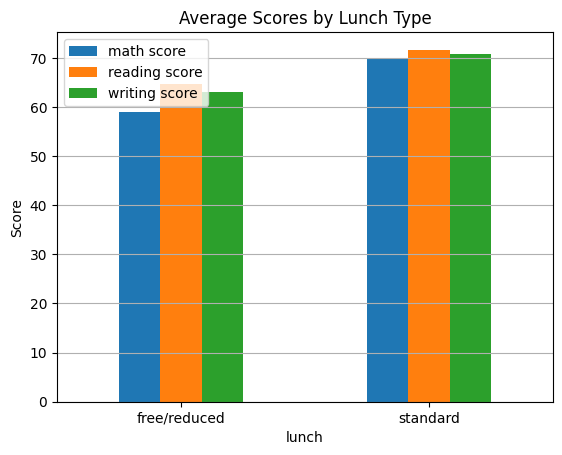

In [34]:
df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean().plot(kind='bar')
plt.title('Average Scores by Lunch Type') #title of the bar graph
plt.ylabel('Score') #defining Y axis
plt.xticks(rotation=0) #text beneath will be horizontal
plt.grid(axis='y') #grid lines through Y-axis
plt.show()

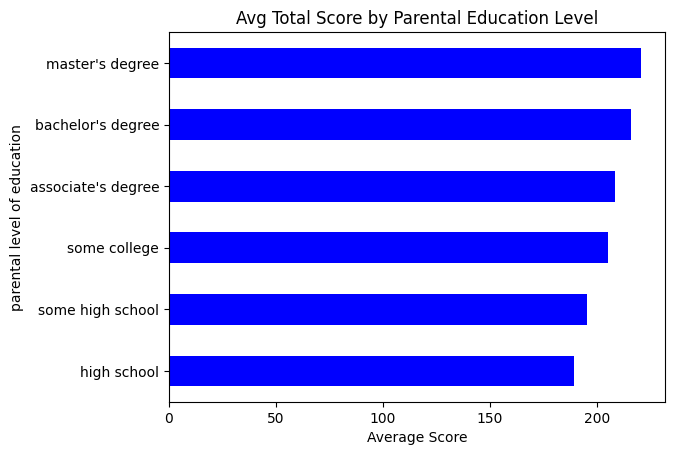

In [37]:
df['total'] = df['math score'] + df['reading score'] + df['writing score']

df.groupby('parental level of education')['total'].mean()

df.groupby('parental level of education')['total'].mean().sort_values().plot(kind='barh', color='blue')
plt.title('Avg Total Score by Parental Education Level')
plt.xlabel('Average Score') #for x axis labelling
plt.show()

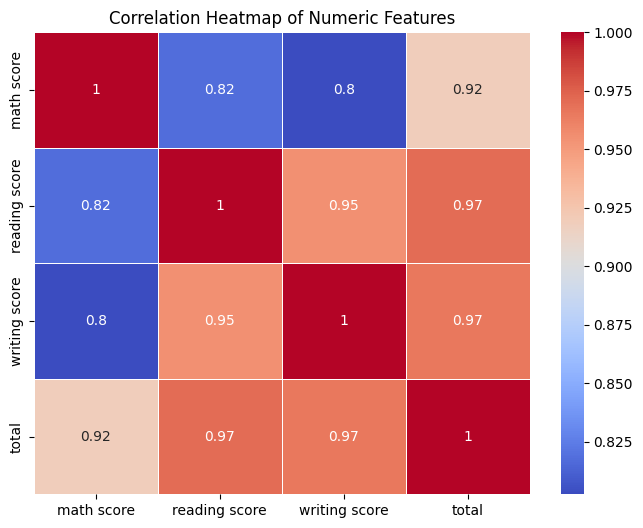

In [38]:
# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Step 2: Plot heatmap on the numeric data
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Hoe to check the outliers:
1. Using Boxplots (Visual Method)
2. Using IQR (Interquartile Range) Method
3. Using Z-score Method (for normally distributed data)



# Applying the Multiple Linear regressor

In [39]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [41]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,math score,reading score,writing score,total,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,218,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,247,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,278,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,148,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,229,True,False,True,False,False,False,False,False,True,False,True,True


In [42]:
X = df_encoded.drop(columns=['math score', 'reading score', 'writing score', 'total'])  # or keep only relevant
y = df_encoded['total']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.16217185763155195
MSE: 1616.4210810261188


In [45]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

                                          Feature  Coefficient
10                                 lunch_standard    27.622964
4                          race/ethnicity_group E    17.880636
3                          race/ethnicity_group D    11.342573
5   parental level of education_bachelor's degree    10.506305
7     parental level of education_master's degree     5.785181
2                          race/ethnicity_group C     2.753804
1                          race/ethnicity_group B    -0.419493
8        parental level of education_some college    -2.562309
9    parental level of education_some high school    -9.818988
0                                     gender_male   -12.275566
6         parental level of education_high school   -13.970888
11                   test preparation course_none   -23.633095


### Residual Analysis

Text(0.5, 1.0, 'Residuals vs Predicted')

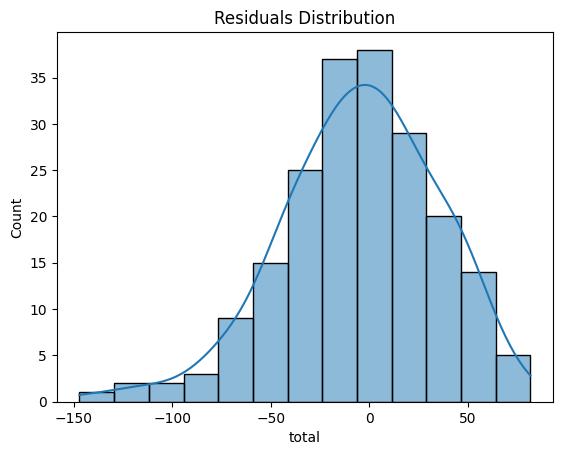

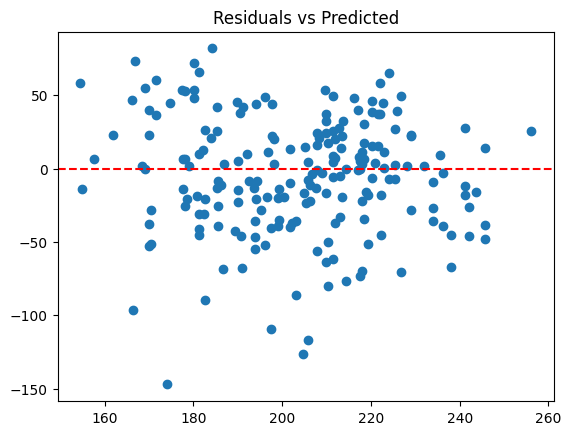

In [46]:
residuals = y_test - y_pred

sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")